<a href="https://colab.research.google.com/github/ccwu0918/F0713-CPlusPlus/blob/main/C%2B%2B_Chapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 班級: 資工一  學號: 13913001 姓名: 吳佳駿

In [ ]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmp_46y7cig".


In [ ]:
!nvcc --version

#**Chapter 12: 類別的基本架構**



#12.1 認識類別 (Page 12-2)

類別可看成是結構的擴充，它不只擁有結構的所有功能，還可定義函數在類別裡。

下圖為視窗示意圖，稍後將分別以結構和類別的概念來撰寫它

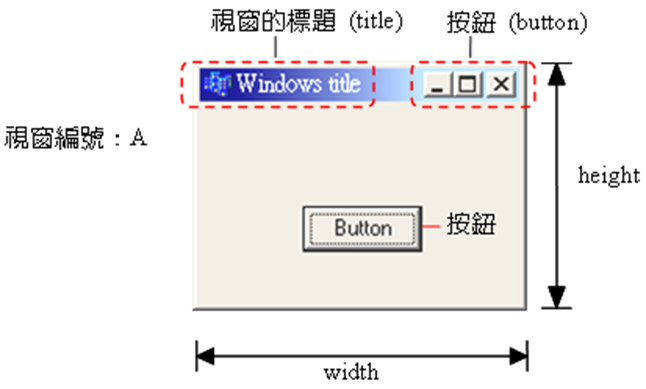

#12.1 認識類別: prog12_1 (Page 12-3)


In [ ]:
%%cuda
// prog12_1, 利用結構來表示視窗
#include <iostream>
#include <cstdlib>
using namespace std;
struct Win  		                   // 利用結構來定義視窗(Window)
{
   char id;
   int width;  	                       // Win結構的width成員
   int height;	                       // Win結構的height成員
};

int area(struct Win w)     		            // 面積函數
{
   return w.width * w.height;    	          // 面積=寬*高
}

int main(int)
{
   Win win1;			               // 宣告Win結構的物件win1

   win1.id = 'A';
   win1.width = 50; 	                   // 設定寬為50
   win1.height = 40;	                   // 設定高為40

   cout << "Window " << win1.id << ", area = " << area(win1) << endl;
   // system("pause");
   return 0;
}


Window A, area = 2000



下面的範例是利用結構來表示視窗：

#12.1.1 類別的基本概念: (Page 12-4, 12-5)

類別（class）包含「資料成員」與「成員函數」：

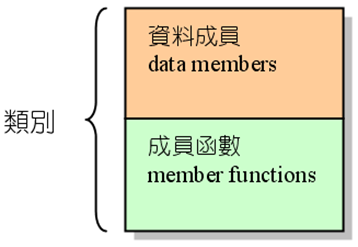

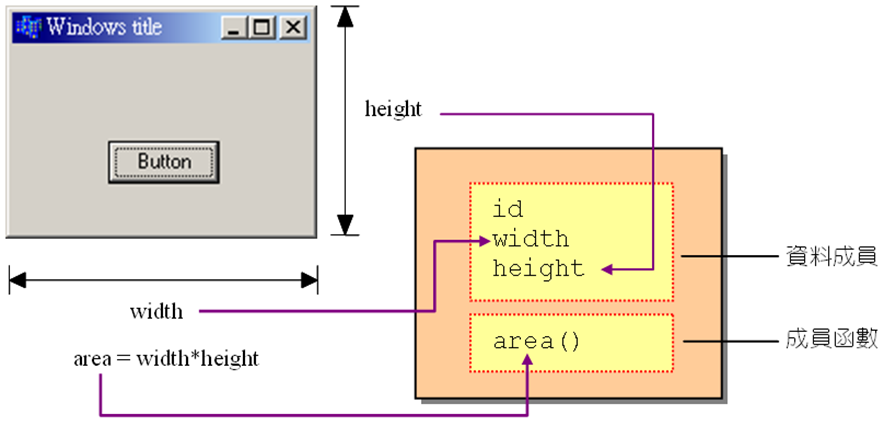

#12.1.2 類別的宣告: (Page 12-6, 12-7)

類別定義的語法如下：

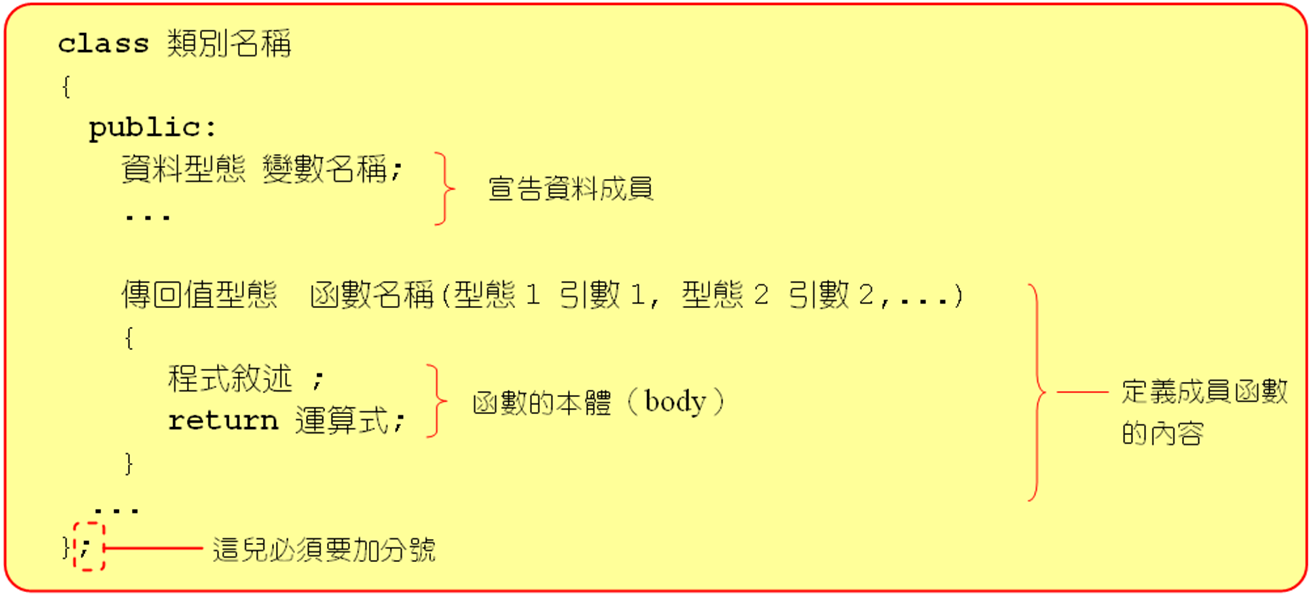

## 定義「視窗」類別

*   成員存取的控制權


1.   public設定在它之後的成員，其屬性均為公有（public），成員可隨意的在類別外部做存取
2.   類別成員的屬性設定為private（私有），則成員只能在類別內部做存取的動作
3.   類別內的成員，若無宣告為public，則預設的屬性為private






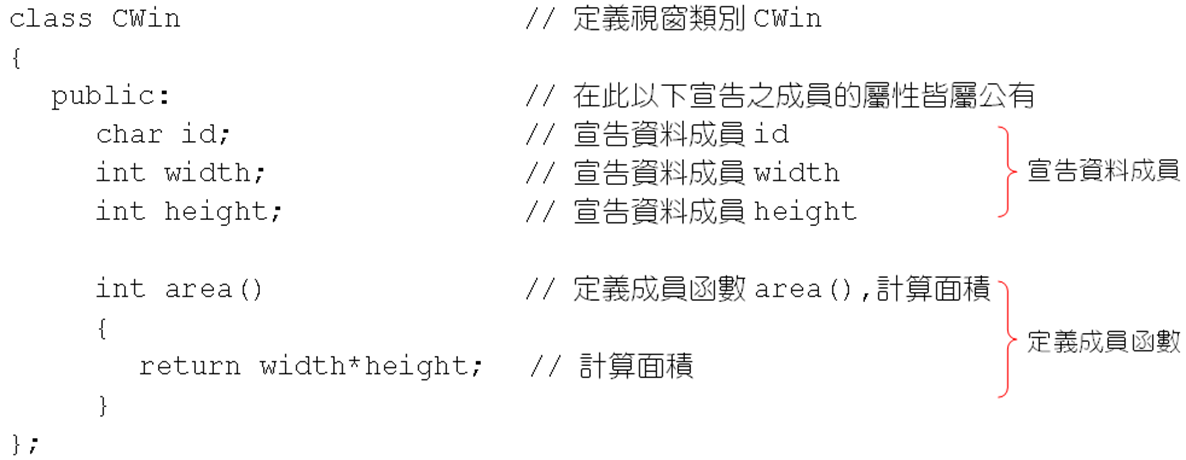

#12.1.3 建立新的物件: (Page 12-7, 12-8, 12-9, 12-10)

建立物件：

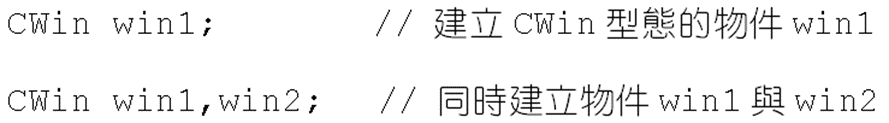

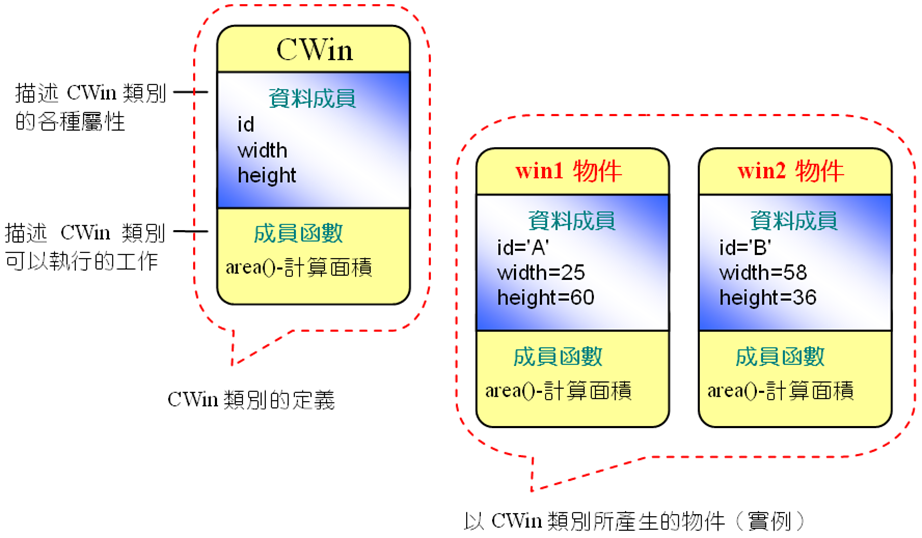

## 存取物件的內容

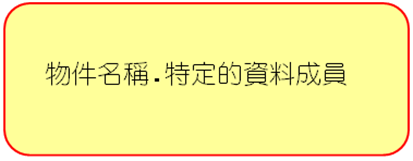

## 設定資料成員的範例

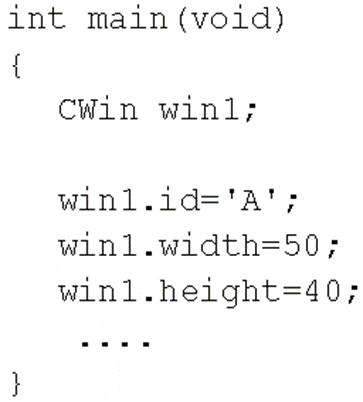

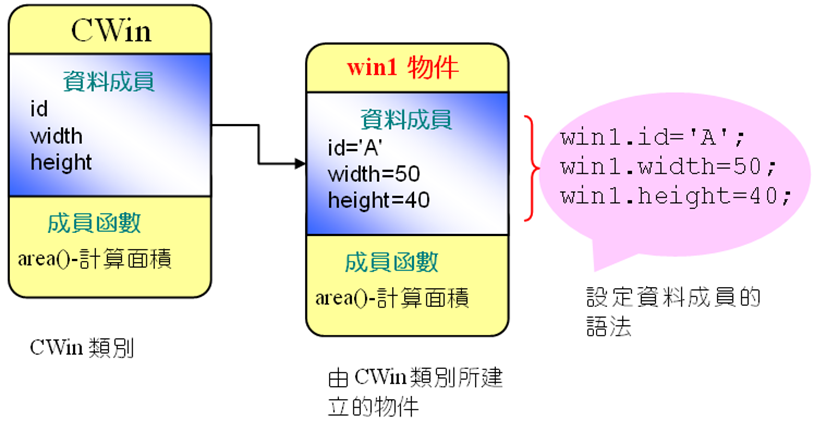

#12.1.4 使用類別來設計完整的程式: prog12_2 (Page 12-10, 12-11)

第一個類別程式：

In [ ]:
%%cuda
// prog12_2, 第一個類別程式
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		// 定義視窗類別CWin
{
   public:   		// 設定資料成員為公有
     char id;
     int width;
     int height;
};
int main(void)
{
   CWin win1;      	// 宣告CWin類別型態的變數win1

   win1.id = 'A';
   win1.width = 50;
   win1.height = 40;

   cout << "Window " << win1.id << ":" << endl;
   cout << "win1.width = " << win1.width << endl;
   cout << "win1.height = " << win1.height << endl;

   // system("pause");
   return 0;
}

#12.1.5 同時建立多個物件 : prog12_3 (Page 12-11, 12-12)

下面的程式示範同時建立數個物件，並存取資料成員：

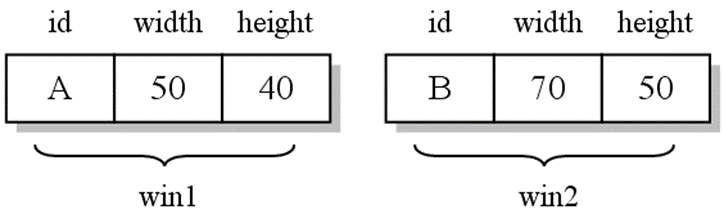

In [ ]:
%%cuda
// prog12_3, 建立物件與資料成員的存取
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		 // 定義視窗類別CWin
{
   public:   		// 設定資料成員為公有
     char id;
     int width;
     int height;
};
int main(void)
{
   CWin win1, win2;     // 宣告CWin類別型態的變數win1與win2

   win1.id = 'A';
   win1.width = 50;
   win1.height = 40;

   win2.id = 'B';
   win2.width = win1.width + 20;
   win2.height = win1.height + 10;

   cout << "Window " << win2.id << ":" << endl;
   cout << "win2.width = " << win2.width << endl;
   cout << "win2.height = " << win2.height << endl;

   // system("pause");
   return 0;
}

Window B:
win2.width = 70
win2.height = 50



#12.1.6 結構變數的使用及初值的設定: prog12_4 (Page 12-13, 12-14)

利用sizeof() 函數可查詢物件與類別所佔的位元組

物件與類別所佔的位元組的程式範例：

In [ ]:
%%cuda
// prog12_4, 物件與類別所佔的位元組
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    	// 定義視窗類別CWin
{
   public:   	// 設定資料成員為公有
     char id;
     int width;
     int height;
};
int main(void)
{
   CWin win1;   	// 宣告CWin類別型態的變數win1

   cout << "sizeof(win1) = " << sizeof(win1) << " bytes" << endl;
   cout << "sizeof(CWin) = " << sizeof(CWin) << " bytes" << endl;

   // system("pause");
   return 0;
}

sizeof(win1) = 12 bytes
sizeof(CWin) = 12 bytes



#12.2 撰寫成員函數

#12.2.1 定義與使用函數: (Page 12-14, 11-15)

類別裡的函數可用如下的語法來定義：


下面的程式，是將結構變數當成引數傳入函數中的範例：

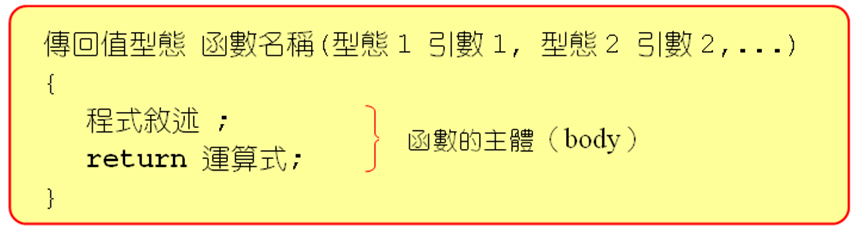

物件要呼叫封裝在類別裡的函數時，可用下列的語法：

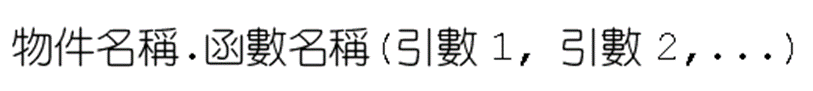

#12.2.1 定義與使用函數: prog12_5 (Page 12-15, 11-16)

加入area()函數到CWin類別裡：


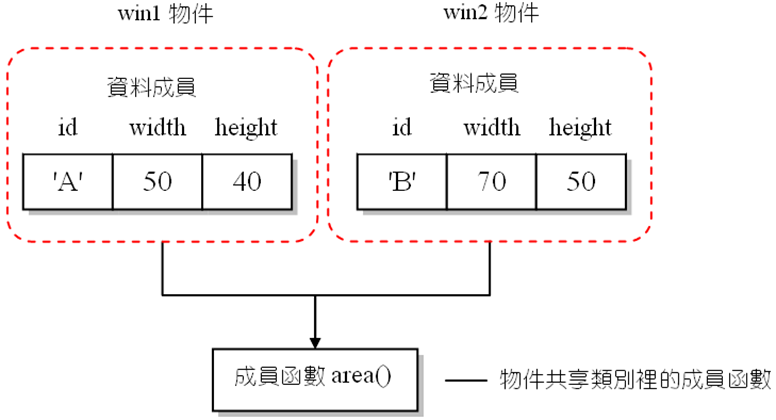

In [ ]:
%%cuda
// prog12_5, 加入area()函數到類別的定義裡
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                   // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area(void) 	                // 定義成員函數area(), 用來計算面積
     {
        return width*height;
     }
};

int main(void)
{
   CWin win1;		                   // 宣告CWin類別型態的變數win1
   win1.id = 'A';
   win1.width = 50;	                     // 設定win1的width成員為50
   win1.height = 40;	                  // 設定win1的height成員為40

   cout << "Window " << win1.id << ":" << endl;
   cout << "Area = " << win1.area() << endl;       // 計算面積
   cout << "sizeof(win1) = " << sizeof(win1) << " bytes" << endl;

   // system("pause");
   return 0;
}

Window A:
Area = 2000
sizeof(win1) = 12 bytes



#12.2.2 於類別裡定義多個函數: prog12_6 (Page 12-17, 11-18)

看一個同時具有兩個成員函數的例子：


In [ ]:
%%cuda
// prog12_6, 於類別裡定義多個函數
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                    // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		                // 定義成員函數area(), 用來計算面積
     {
         return width * height;
     }
     int perimeter()                      // 定義成員函數perimeter(), 用來計算周長
     {
         return 2 * (width + height);
     }
};

int main(void)
{
   CWin win1;   		                 // 宣告CWin類別型態的變數win1

   win1.id = 'A';
   win1.width = 50;	                        // 設定win1的width成員為50
   win1.height = 40;	                        // 設定win1的height成員為40

   cout << "Window " << win1.id << ":" << endl;
   cout << "Area = " << win1.area() << endl;  		 // 計算面積
   cout << "Perimeter = " << win1.perimeter() << endl;    // 計算周長

   // system("pause");
   return 0;
}

Window A:
Area = 2000
Perimeter = 180



#12.2.3 函數的位置：(Page 12-18, 12-19)

範疇解析運算子：

範疇解析運算子的用法

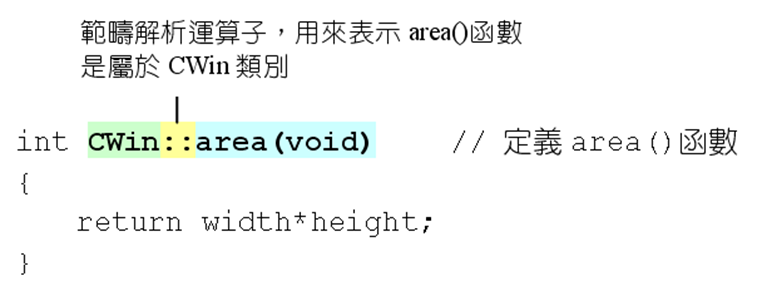

也可以在函數前面加上inline關鍵字

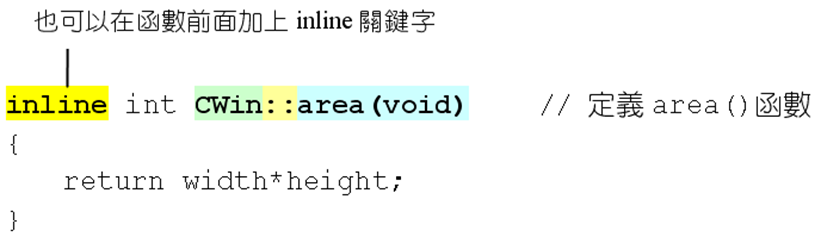

#12.2.3 函數的位置：prog12_7 (Page 12-18, 12-19)

成員函數定義在類別之外，只需在類別的定義內加入函數的原型即可：


In [ ]:
%%cuda
// prog12_7, 將函數定義於類別之外
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    			       // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;
     int area(void);    	     // 成員函數area()的原型
};

int CWin::area(void) 	           // 定義area()函數
{
   return width * height;
}

int main(void)
{
   CWin win1;   			   // 宣告CWin類別型態的變數win1

   win1.id = 'A';
   win1.width = 50;
   win1.height = 40;

   cout << "Window " << win1.id << ":" << endl;
   cout << "Area = " << win1.area() << endl;

   // system("pause");
   return 0;
}

Window A:
Area = 2000



#12.2.4 類別內資料成員的存取方式：(Page 12-21, 12-22)

在類別宣告的內部使用資料成員，可直接取用其名稱：


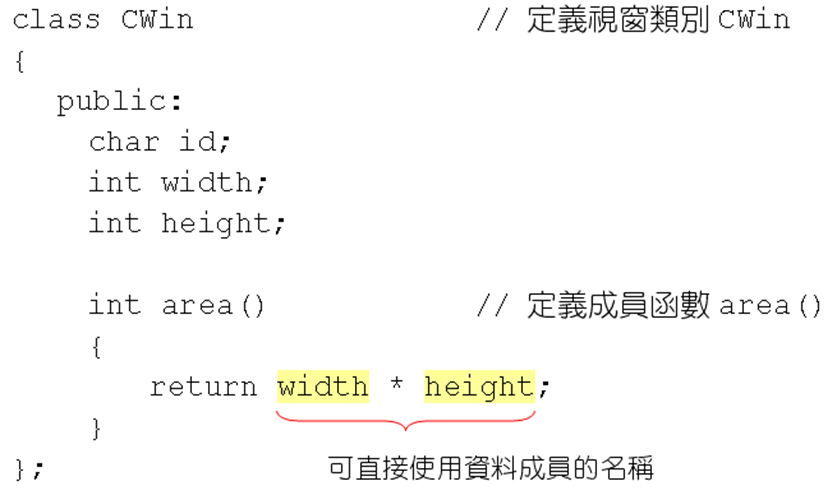

在資料成員前面的this代表指向「取用此一資料成員之物件」的指標

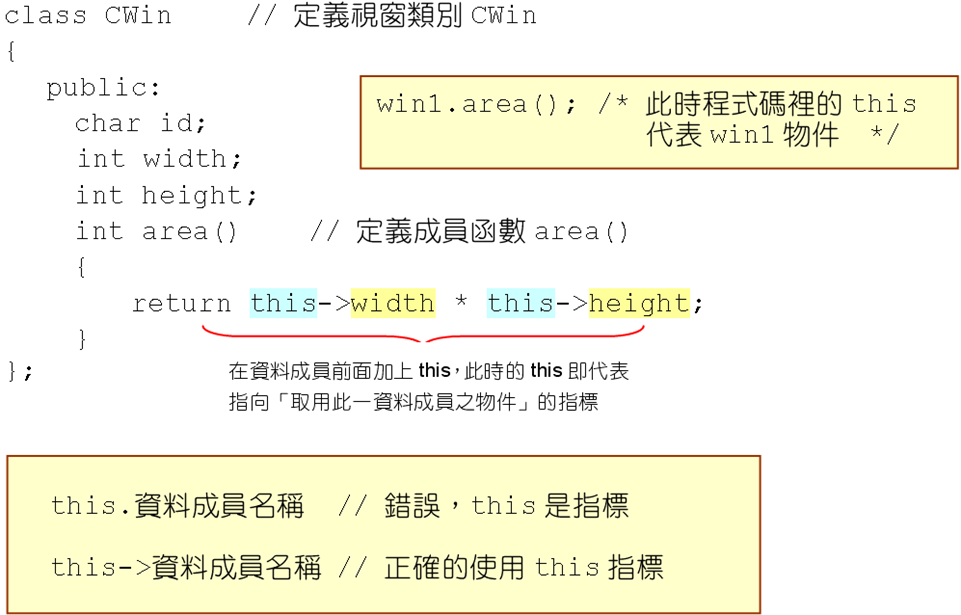

#12.2.5 在類別定義的內部呼叫函數：prog12_8 (Page 12-23, 12-24, 12-25)

在類別宣告的內部使用資料成員，可直接取用其名稱：


In [ ]:
%%cuda
// prog12_8, 在類別定義的內部呼叫函數
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area(void) 	            // 定義成員函數area(), 用來計算面積
     {
        return width * height;
     }
     void show_area(void)              // 定義成員函數show_area(), 用來顯示面積
     {
        cout << "Window " << id << ", area = " << area() << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.id = 'A';
   win1.width = 50;
   win1.height = 40;
   win1.show_area();  	            // 顯示面積

   // system("pause");
   return 0;
}

Window A, area = 2000



把prog12_8的show_area() 改成如下的敘述

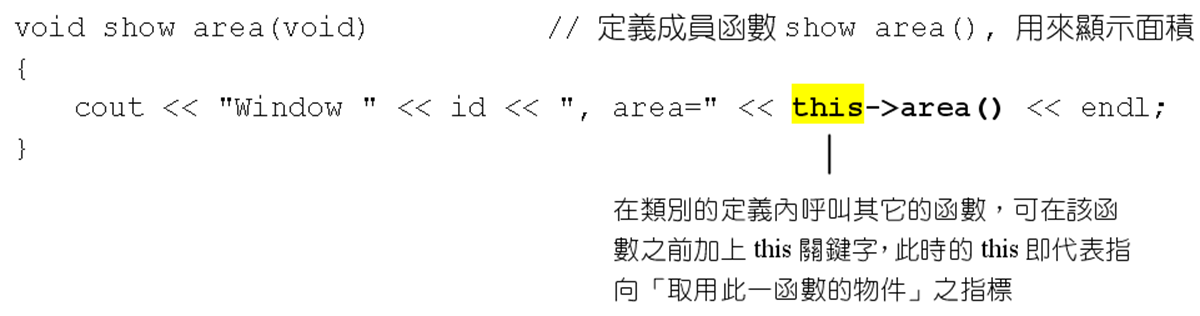

In [ ]:
%%cuda
// prog12_8, 在類別定義的內部呼叫函數
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area(void) 	            // 定義成員函數area(), 用來計算面積
     {
        return width * height;
     }
     void show_area(void)              // 定義成員函數show_area(), 用來顯示面積
     {
        cout << "Window " << id << ", area = " << this->area() << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.id = 'A';
   win1.width = 50;
   win1.height = 40;
   win1.show_area();  	            // 顯示面積

   // system("pause");
   return 0;
}

Window A, area = 2000



假設在main() 主程式裡有這麼一行敘述

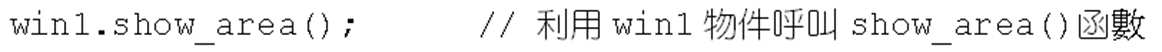

則this即代表指向win1物件的指標   

# 12.3 函數引數的傳遞與多載




# 12.3.1 引數的傳遞：prog12_9 (Page 12-26, 12-27)

下面是傳遞物件到函數裡的範例：

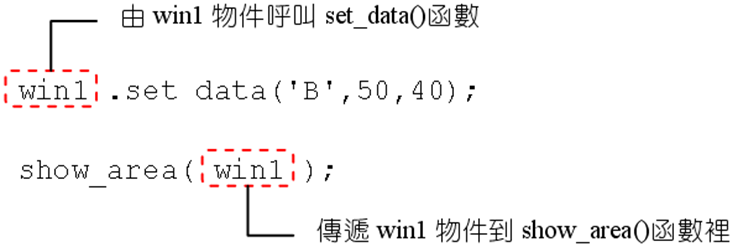

In [ ]:
%%cuda
// prog12_9, 傳遞引數到函數裡
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                         // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		                     // 定義成員函數area(), 用來計算面積
     {
        return width * height;
     }
     void show_area(void)
     {
        cout << "Window " << id << ", area = " << area() << endl;
     }
     void set_data(char i, int w, int h)       // set_data() 函數
     {
        id=i;        	                   // 設定id成員
        width=w; 		                    // 設定width成員
        height=h; 	                         // 設定height成員
     }
};

int main(void)
{
   CWin win1;

   win1.set_data('B', 50, 40);
   win1.show_area();

   // system("pause");
   return 0;
}

Window B, area = 2000



下面的程式片段是將prog12_9中的區域變數i、w與h標示出來

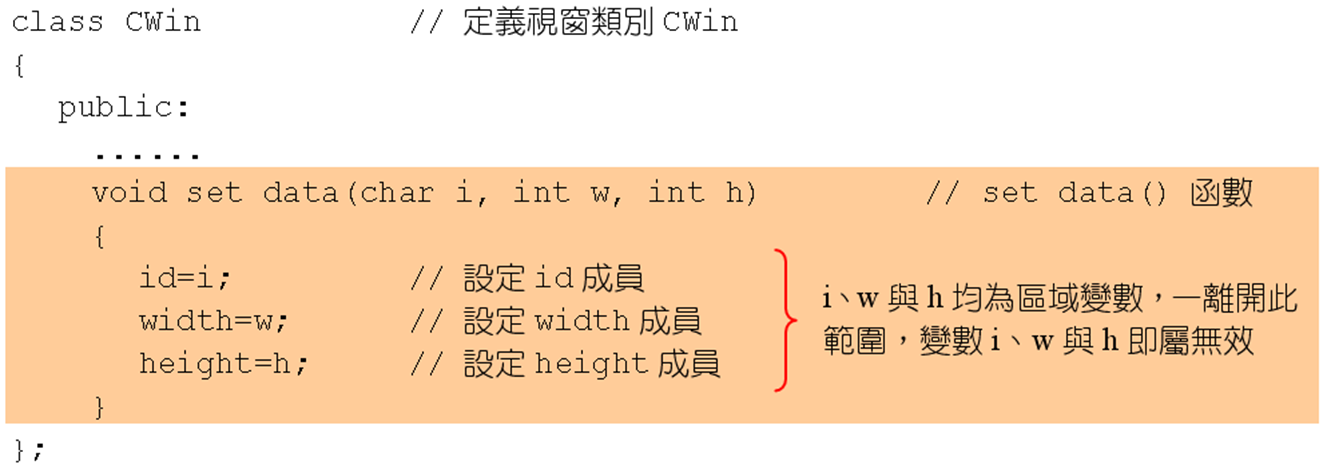

#12.3.2 傳遞物件到函數裡：prog12_10 (Page 12-28, 11-29)

下面的程式可驗證共同空間記憶體的安排的程式範例：


In [ ]:
%%cuda
// prog12_10, 傳遞物件到函數裡
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		            // 定義成員函數area(), 用來計算面積
     {
        return width*height;
     }

     void set_data(char i, int w, int h)      // set_data() 函數
     {
        id=i;        	          // 設定id成員
        width = w; 		           // 設定width成員
        height = h; 	            // 設定height成員
     }
};

void show_area(CWin win)   	               // 把show_area()定義成一般的函數
{
   cout << "Window " << win.id <<", area = " << win.area() << endl;
}

int main(void)
{
   CWin win1;

   win1.set_data('B', 50, 40);      // 由win1物件呼叫set_data()函數
   show_area(win1);     	   // 傳遞win1物件到show_area()函數裡

   // system("pause");
   return 0;
}

Window B, area = 2000



#11.3.3 函數的多載：prog12_11 (Page 12-30, 12-31)

在類別裡定義的成員函數也可以多載，如下面的範例程式：


In [ ]:
%%cuda
// prog12_11, 函數的多載
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                    // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		                // 定義成員函數area(), 用來計算面積
     {
        return width * height;
     }
     void show_area(void)
     {
        cout << "Window " << id << ", area = " << area() << endl;
     }
     void set_data(char i, int w, int h)	     // 第一個set_data()函數
     {
        id = i;
        width = w;
        height = h;
     }
     void set_data(char i)  			// 第二個set_data()函數
     {
        id = i;
     }
     void set_data(int w, int h)   	 	  // 第三個set_data()函數
     {
        width = w;
        height = h;
     }
};

int main(void)
{
   CWin win1, win2;

   win1.set_data('A', 50, 40);
   win2.set_data('B');
   win2.set_data(80, 120);

   win1.show_area();
   win2.show_area();

   // system("pause");
   return 0;
}

Window A, area = 2000
Window B, area = 9600



#12.4 公有成員與私有成員： prog12_12 (Page 12-32)

## 可能導致的危險
下面的範例示範從類別外部存取資料時，可能導致的危險

In [ ]:
%%cuda
// prog12_12, 在類別定義的內部呼叫函數
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area(void)
     {
        return width * height;
     }
     void show_area(void)
     {
        cout << "Window " << id;
        cout << ", area = " << area() << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.id = 'A';
   win1.width = -50;	      // 刻意將width成員設為-50
   win1.height = 40;
   win1.show_area();           // 顯示面積

   // system("pause");
   return 0;
}

Window A, area = -2000




#12.4.1 建立私有成員： (Page 12-33, 12-34, 12-35)

私有成員（private member）的設定方式如下：

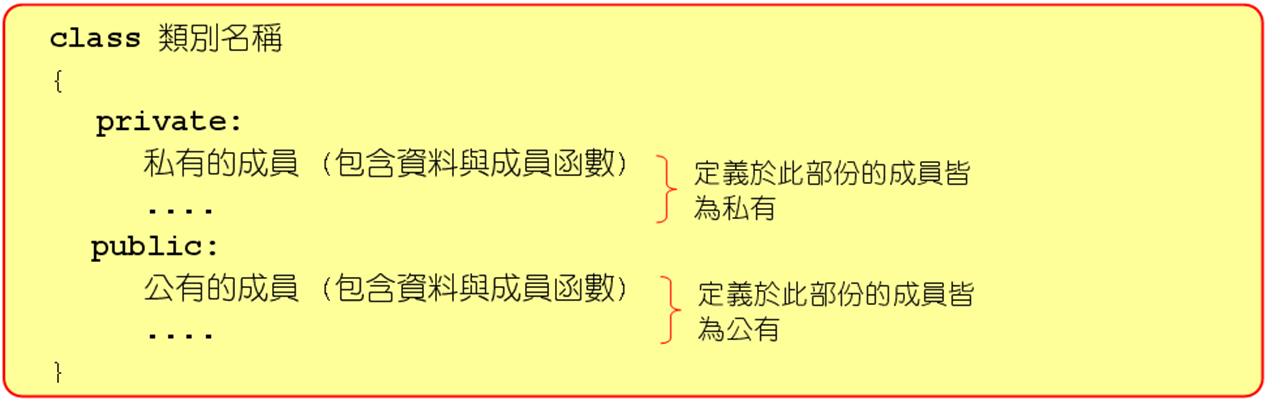

下面的程式碼設定id、width與height資料成員為私有，area() 函數為公有

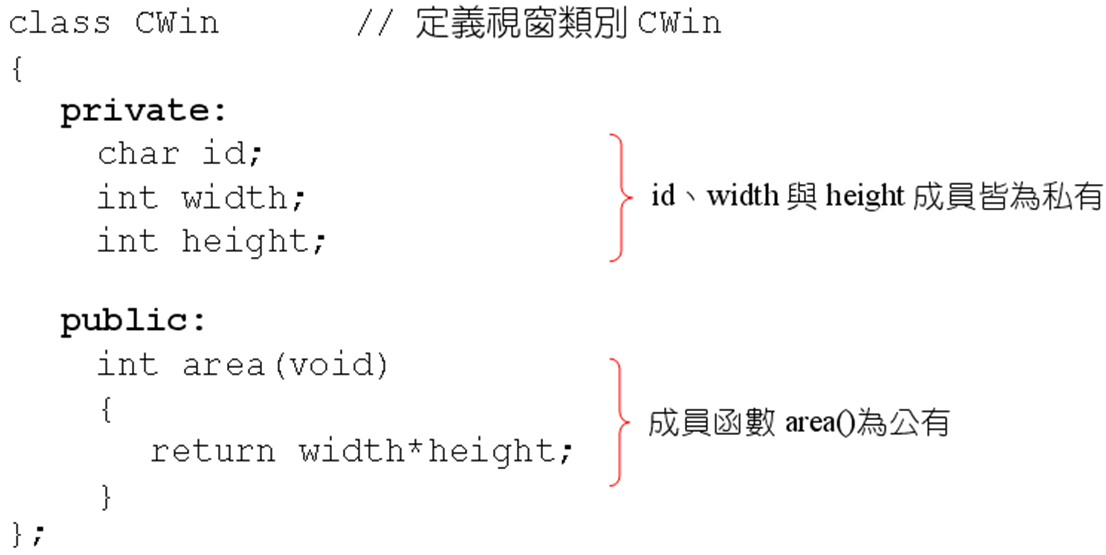

C++成員的預設屬性為私有，因此id、width與height成員會被視為私有

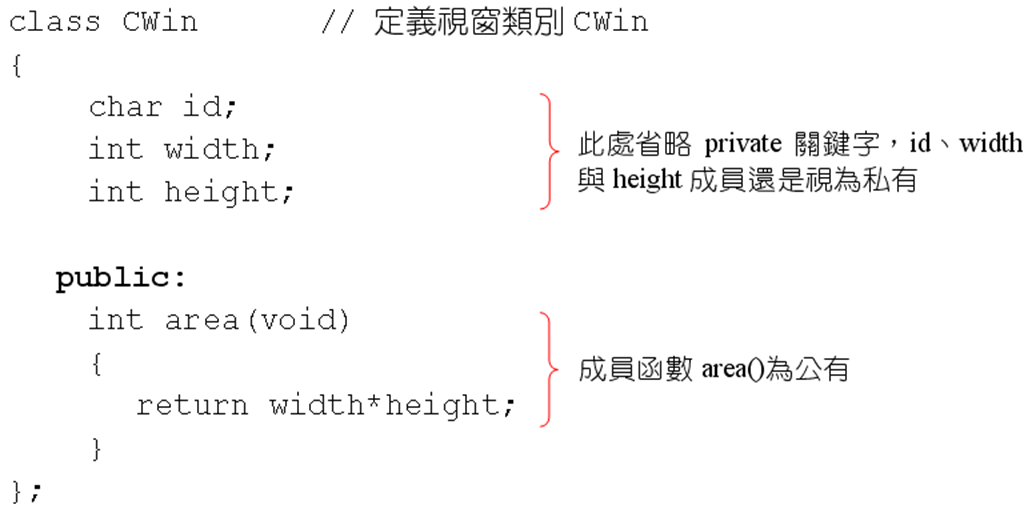


#12.4.1 建立私有成員：prog12_13 (Page 12-34, 12-35)

## 錯誤示範
下面為prog12_13為私有成員的使用範例（錯誤示範）：

In [ ]:
%%cuda
// prog12_13, 私有成員的使用範例
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		            // 定義視窗類別CWin
{
   private:
     char id;
     int width;
     int height;

   public:
     int area(void) 	         // 成員函數area()
     {
        return width * height;
     }
     void show_area(void)           // 成員函數show_area()
     {
        cout << "Window "<< id <<", area = " << area() << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.id = 'A';
   win1.width = -5;
   win1.height = 12;

   win1.show_area();
   // system("pause");
   return 0;
}

/tmp/tmp_46y7cig/360402ad-9a75-4600-b420-73c2da12fa64/single_file.cu(27): error: member "CWin::id" (declared at line 8) is inaccessible
     win1.id = 'A';
          ^

/tmp/tmp_46y7cig/360402ad-9a75-4600-b420-73c2da12fa64/single_file.cu(28): error: member "CWin::width" (declared at line 9) is inaccessible
     win1.width = -5;
          ^

/tmp/tmp_46y7cig/360402ad-9a75-4600-b420-73c2da12fa64/single_file.cu(29): error: member "CWin::height" (declared at line 10) is inaccessible
     win1.height = 12;
          ^

3 errors detected in the compilation of "/tmp/tmp_46y7cig/360402ad-9a75-4600-b420-73c2da12fa64/single_file.cu".



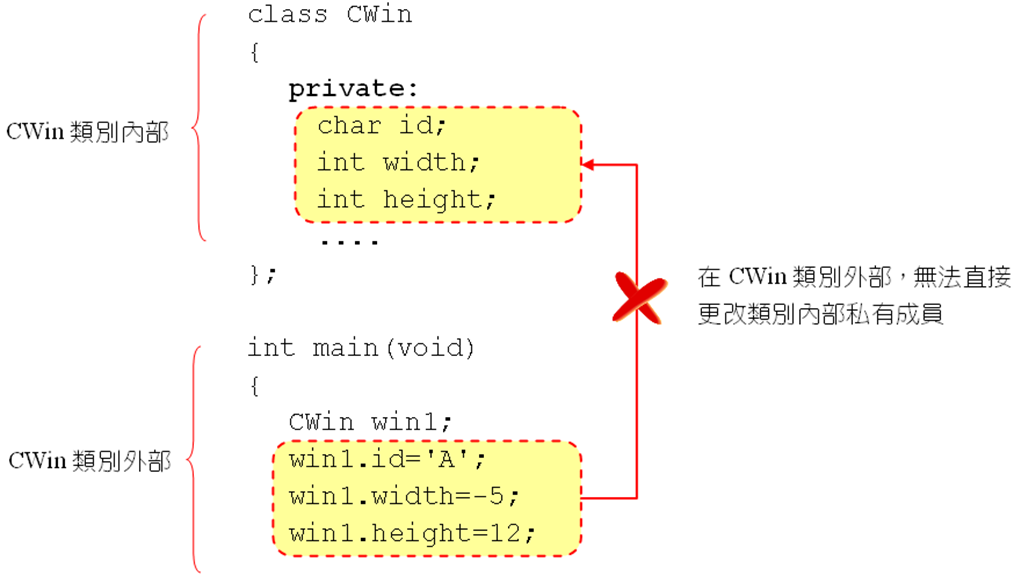


#12.4.2 建立公有成員：prog12_14 (Page 12-35, 12-36, 12-37)

下面的範例是利用公有函數存取私有成員：

In [ ]:
%%cuda
// prog12_14, 利用公有函數存取私有成員
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    				           // 定義視窗類別CWin
{
   private:
     char id;				          // 私有資料成員
     int width;   			           // 私有資料成員
     int height;  			           // 私有資料成員

   public:
     int area(void)   			        // 公有成員函數area()
     {
         return width * height;
     }
     void show_area(void)    	           // 公有成員函數show_area()
     {
        cout<<"Window "<< id <<", area = " << area() << endl;
     }
     void set_data(char i, int w, int h)        // 公有成員函數set_data()
     {
        id = i;
        if(w > 0 && h > 0)
        {
           width = w;
           height = h;
        }
        else
           cout << "input error" << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.set_data('A', 50, 40);
   win1.show_area();  	                 // 顯示面積
   // system("pause");
   return 0;
}

Window A, area = 2000



從prog12_14可看出，唯有透過公有成員函數，才能存取私有成員

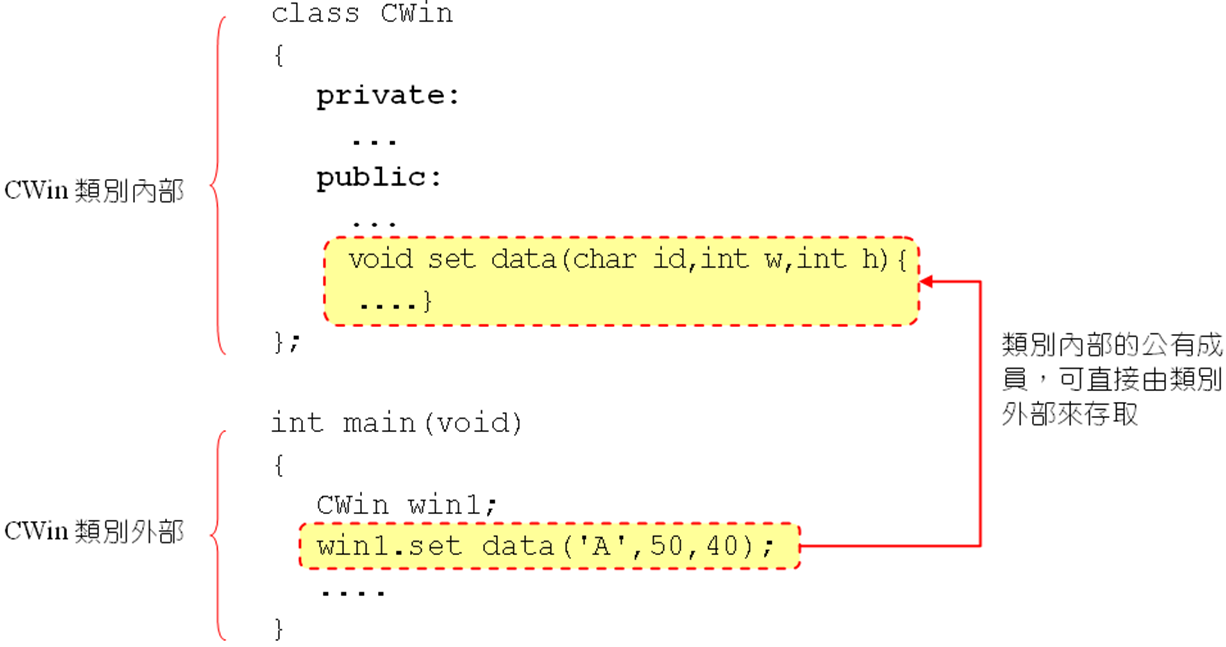


#12.4.3 私有的成員函數：prog12_15 (Page 12-38, 12-39)

下面的程式示範函數不想被外界所呼叫，一樣可設為私有，如下面的程式範例：

In [ ]:
%%cuda
// prog12_15, 私有的成員函數
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                       // 定義視窗類別CWin
{
   private:
     char id;      	                      // 私有資料成員
     int width;   	                       // 私有資料成員
     int height;  	                        // 私有資料成員

     int area(void)                          // 私有成員函數area()
     {
         return width*height;
     }

   public:
     void show_area(void)                    // 公有成員函數show_area()
     {
        cout << "Window " << id << ", area = " << area() << endl;
     }
     void set_data(char i, int w, int h)       // 公有成員函數set_data()
     {
        id = i;
        if(w > 0 && h > 0)
        {
           width = w;
           height = h;
        }
        else
           cout << "input error" << endl;
     }
};

int main(void)
{
   CWin win1;

   win1.set_data('A', 50, 40);
   win1.show_area();  	                     // 顯示面積
   // system("pause");
   return 0;
}

Window A, area = 2000




#12.4.4 資料的封裝：(Page 12-39, 12-40)

## 封裝（encapsulation）

把資料成員和成員函數依功能劃分為「私有」與「公有」，並且包裝在一個類別內來保護私有成員，使得它不會直接受到外界的存取

#12.5 友誼函數： (Page 12-40)

*   友誼函數不屬於某個類別，但它可存取該類別內的成員
*   友誼函數以friend做宣告，放置位置可以有下列兩種：
    1.   把友誼函數的原型放在類別的定義內，把定義放在類別外
    2.   把友誼函數直接定義在類別內
*   友誼函數不會太複雜的話，編譯器會自動把它當成inline函數

#12.5 友誼函數：prog12_16 (Page 12-40, 12-41)

下面的程式是使用友誼函數的例子：

In [ ]:
%%cuda
// prog12_16, 友誼函數的使用
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin                              // 定義視窗類別CWin
{
   public:
     void set_data(char i, int w, int h)          // 設定數值的函數
     {
        id = i;
        width = w;
        height = h;
     }
   private:
     char id;
     int width;
     int height;

   friend void show_member(CWin);   	// 友誼函數的原型
};

void show_member(CWin w)  			    // 定義友誼函數
{
    cout << "Window " << w.id;
    cout << ": width = " << w.width;
    cout << ", height = " << w.height << endl;
}

int main(void)
{
   CWin win1, win2;

   win1.set_data('A', 50, 40);  			// 呼叫set_data()來設值
   win2.set_data('B' ,80, 60);
   show_member(win1);
   show_member(win2);

   // system("pause");
   return 0;
}

Window A: width = 50, height = 40
Window B: width = 80, height = 60



下圖顯示友誼函數存取的權限：

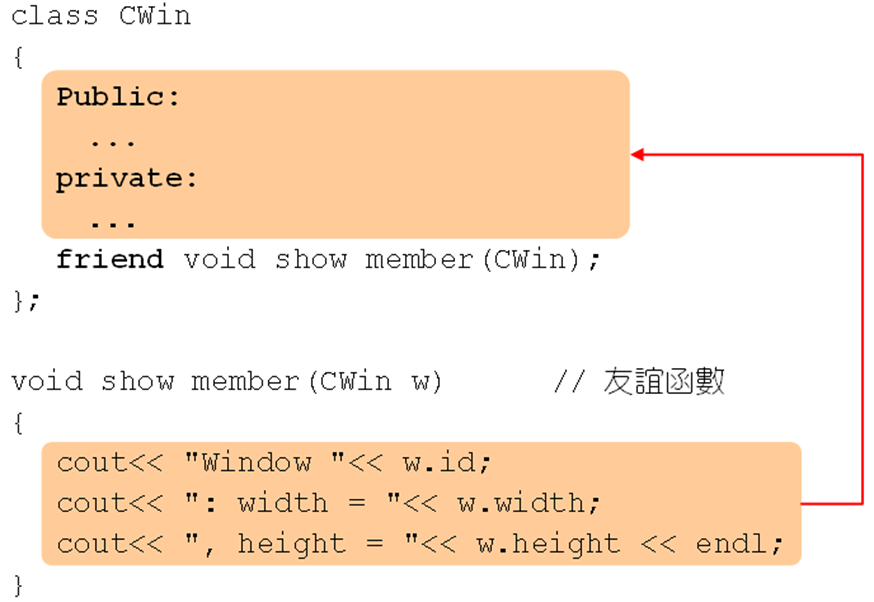

## 友誼函數的注意事項：

1.   您可以在類別內只定義完整的友誼函數，或只定義它的原型，而將其完整的定義放置在類別外，如prog12_16即是
2.   雖然友誼函數的原型或定義是放在類別內，但它並不屬於類別的成員，自然也就不具有公有或私有的特性




---



# 習題：12.1 認識類別  



### hw12_1. 設類別Caaa的定義為：



```
class Caaa
{
   public:
int a;
      int b;
      int c;
};
```

試在程式碼裡完成下列各敘述：

(a)	試在主函數main()裡建立一個Caaa類別型態的變數obj。

(b)	將obj資料成員a的值設為1，b的值設為3。

(c)	計算a+b之後設給成員c。

(d)	印出a、b與c的值。




In [ ]:
%%cuda
// hw12_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;








int main(void)
{




   cout << "a = " << obj.a << endl;
   cout << "b = " << obj.b << endl;
   cout << "c = " << obj.c << endl;

   // system("PAUSE");
   return 0;
}

/* output--------
a = 1
b = 3
c = 4
---------------*/

a = 1
b = 3
c = 4



In [ ]:
%%writefile hw12_1.cpp
// hw12_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;








int main(void)
{




   cout << "a = " << obj.a << endl;
   cout << "b = " << obj.b << endl;
   cout << "c = " << obj.c << endl;

   // system("PAUSE");
   return 0;
}

/* output--------
a = 1
b = 3
c = 4
---------------*/

In [ ]:
!g++ hw12_1.cpp -o hw12_1

In [ ]:
!./hw12_1


### hw12_2. 試找出下列程式中的錯誤，並試著訂正之。


```
// hw12_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class Crectangle
{
   int width;
   int height;
}

int main(void)
{
     Crectangle rect1;
     rect1.width = 15;
     rect2.height = 10;
     cout << "面積為 " << rect1.width * rect1.height ;
     
     //system("pause");
     return 0;
}

```



In [ ]:
%%cuda
// hw12_2, 班級: 資工一  學號: xxx 姓名: xxx
# include <iostream>
# include <cstdlib>
using namespace std;
class Crectangle
{
   int width;
   int height;
}

int main(void)
{
     Crectangle rect1;
     rect1.width = 15;
     rect2.height = 10;
     cout << "面積為 " << rect1.width * rect1.height ;

     //system("pause");
     return 0;
}

面積為 150



In [ ]:
%%writefile hw12_2.cpp
// hw12_2, 班級: 資工一  學號: xxx 姓名: xxx
# include <iostream>
# include <cstdlib>
using namespace std;
class Crectangle
{
   int width;
   int height;
}

int main(void)
{
     Crectangle rect1;
     rect1.width = 15;
     rect2.height = 10;
     cout << "面積為 " << rect1.width * rect1.height ;

     //system("pause");
     return 0;
}

In [ ]:
!g++ hw12_2.cpp -o hw12_2

In [ ]:
!./hw12_2


### hw12_3. 試執行下面的程式，並以C++程式碼註解方式說明每一行的意義：

```
// hw12_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class my_data
{
   public:
      int age;
      int weight;
};

int main(void)
{
   my_data a;
   a.age = 18;
   a.weight = 57;
   cout << "age = " << a.age << endl;
   cout << "weight = " << a.weight << endl;
   // system("pause");
   return 0;
}   
```



In [ ]:
%%writefile hw12_3.cpp
// hw12_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class my_data
{
   public:
      int age;
      int weight;
};

int main(void)
{
   my_data a;
   a.age = 18;
   a.weight = 57;
   cout << "age = " << a.age << endl;
   cout << "weight = " << a.weight << endl;
   // system("pause");
   return 0;
}

Writing hw12_3.cpp


In [ ]:
!g++ hw12_3.cpp -o hw12_3

In [ ]:
!./hw12_3

# 習題：12.2 撰寫成員函數  

### hw12_4. 參考程式prog12_5，除了保有原來的成員之外，並加入一個字串型態的資料成員title，代表視窗的標題，然後定義一set_title() 函數，用來設定視窗物件的標題，以及display() 函數，用來顯示視窗物件的標題。



In [ ]:
%%writefile hw12_4.cpp
// hw12_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                   // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area(void) 	                // 定義成員函數area(), 用來計算面積
     {
        return width*height;
     }
};

int main(void)
{
   CWin win1;		                   // 宣告CWin類別型態的變數win1
   win1.id = 'A';
   win1.width = 50;	                     // 設定win1的width成員為50
   win1.height = 40;	                  // 設定win1的height成員為40

   cout << "Window " << win1.id << ":" << endl;
   cout << "Area = " << win1.area() << endl;       // 計算面積
   cout << "sizeof(win1) = " << sizeof(win1) << " bytes" << endl;

   // system("pause");
   return 0;
}
/* output-------------
Window A:
title=My Windows
Area= 2000
--------------------*/

In [ ]:
!g++ hw12_4.cpp -o hw12_4

In [ ]:
!./hw12_4


### hw12_5.	試問在下列哪一個選項可以呼叫void set(int r)這個函數？



```
(a)	set("hello");
(b)	set(50);
(c)	set(10,25);
(d)	set(3.14);
```


In [ ]:
%%writefile hw12_5.cpp
// hw12_5, 班級: 資工一  學號: xxx 姓名: xxx
// 在此寫上正確答案

### hw12_6. 試撰寫一類別CTemp，其成員函數CtoF(double c)可以用來計算攝氏溫度轉成華氏溫度(f=c/0.37)，並計算攝氏37.2度時的華氏溫度。





In [ ]:
%%cuda
//hw12_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;









int main(void)
{
  CTemp tmp;
  cout << "攝氏 37.2 度 = 華氏 " << tmp.CtoF(37.2);
  cout << "度" << endl;

  // system("PAUSE");
  return 0;
}

/* output---------------------------
攝氏 37.2 度 = 華氏 100.541 度
----------------------------------*/

In [ ]:
%%writefile hw12_6.cpp
//hw12_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;









int main(void)
{
  CTemp tmp;
  cout << "攝氏 37.2 度 = 華氏 " << tmp.CtoF(37.2);
  cout << "度" << endl;

  // system("PAUSE");
  return 0;
}

/* output---------------------------
攝氏 37.2 度 = 華氏 100.541 度
----------------------------------*/

In [ ]:
!g++ hw12_6.cpp -o hw12_6

In [ ]:
!./hw12_6

### hw11_7.	試設計一個CBox類別，具有length、width與height三個整數的資料成員，並完成下列的程式設計：

```
(a)	定義volume() 函數，用來計算CBox物件的體積。
(b)	定義surfaceArea() 函數，用來計算CBox物件的表面積。
```


In [ ]:
%%cuda
//hw12_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
















int main(void)
{




  cout << "長 = " << a.length << endl;
  cout << "寬 = " << a.width << endl;
  cout << "高 = " << a.height << endl;
  a.volume();
  a.surfaceArea();

  // system("PAUSE");
  return 0;
}

/* output---------------------------
長=5
寬=4
高=3
體積=60
表面積=94
----------------------------------*/

長 = 5
寬 = 4
高 = 3
體積 = 60
表面積 = 94



In [ ]:
%%writefile hw12_7.cpp
//hw12_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
















int main(void)
{




  cout << "長 = " << a.length << endl;
  cout << "寬 = " << a.width << endl;
  cout << "高 = " << a.height << endl;
  a.volume();
  a.surfaceArea();

  // system("PAUSE");
  return 0;
}

/* output---------------------------
長=5
寬=4
高=3
體積=60
表面積=94
----------------------------------*/

In [ ]:
!g++ hw12_7.cpp -o hw12_7

In [ ]:
!./hw12_7

# 習題：12.3  函數引數的傳遞與多載

### hw12_8. 試設計一個Calculator類別，並完成下列各函數的程式設計：

```
(a)	定義add(a,b) 函數，用來計算二數之和。
(b)	定義sub(a,b) 函數，用來計算二數之差。
(c)	定義mul(a,b) 函數，用來計算二數之乘積。
(d)	定義div(a,b) 函數，用來計算a/b。
```

In [ ]:
%%cuda
// hw12_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





















int main(void)
{
   Calculator A;
   int a = 3, b = 6;
   cout << "a = " << a << ", b = " << b << endl;
   A.add(a, b);
   A.sub(a, b);
   A.mul(a, b);
   A.div(a, b);

  // system("PAUSE");
  return 0;
}

/* output---------------------------
a = 3, b = 6
二數之和 = 9
二數之差 = -3
二數之積 = 18
二數之商 = 0.5
----------------------------------*/

In [ ]:
%%writefile hw12_8.cpp
// hw12_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





















int main(void)
{
   Calculator A;
   int a = 3, b = 6;
   cout << "a = " << a << ", b = " << b << endl;
   A.add(a, b);
   A.sub(a, b);
   A.mul(a, b);
   A.div(a, b);

  // system("PAUSE");
  return 0;
}

/* output---------------------------
a = 3, b = 6
二數之和 = 9
二數之差 = -3
二數之積 = 18
二數之商 = 0.5
----------------------------------*/

In [ ]:
!g++ hw12_8.cpp -o hw12_8

In [ ]:
!./hw12_8

### hw12_9.	試設計一長方形類別CRect，內含width、height與weight三個資料成員，並設計set()函數的多載，使其具有下面的功能：

```
(a)	set(double wg)				// 可設定長方形的重量
(b)	set(int w,int h) 			// 可設定長方形的寬和高
(c)	set(double wg,int w,int h)	    // 可設定長方形的重量、寬和高
```
同時也請撰寫show()函數，用來顯示資料成員的值，並以實例測試之。

In [ ]:
%%cuda
// hw12_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





























int main(void)
{
   CRect A,B;

   A.set(2.6);
   A.set(3,5);
   B.set(3.8,6,10);

   cout<< "object A:" << endl;
   A.show();

   cout << endl << "object A:" << endl;
   B.show();

   // system("PAUSE");
   return 0;
}

/* output---------------------------
object A:
height = 5
width = 3
weight = 2.6

object A:
height = 10
width = 6
weight = 3.8
----------------------------------*/

In [ ]:
%%writefile hw12_9.cpp
// hw12_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





























int main(void)
{
   CRect A,B;

   A.set(2.6);
   A.set(3,5);
   B.set(3.8,6,10);

   cout<< "object A:" << endl;
   A.show();

   cout << endl << "object A:" << endl;
   B.show();

   // system("PAUSE");
   return 0;
}

/* output---------------------------
object A:
height = 5
width = 3
weight = 2.6

object A:
height = 10
width = 6
weight = 3.8
----------------------------------*/

In [ ]:
!g++ hw12_9.cpp -o hw12_9

In [ ]:
!./hw12_9

# 習題：12.4 公有成員與私有成員  



### hw12_10. 如何區分私有成員與公有成員？它們分別用在什麼場合？

Ans:


```
在類別內宣告成員時，若是沒有特別指明成員的屬性，C++預設是私有，即private，若是加上public，則在之後宣告的成員皆為公有。
成員宣告為私有時，從類別外部就無法存取到類別內部的私有成員。成員宣告為公有時，即可自由地從類別外部存取到類別內部的成員。若是要存取私有成員時，可以透過公有成員函數來存取。
```





### hw12_11.	請問「封裝」的意思為何？它可為我們帶來哪些好處？
Ans:


```
所謂的「封裝」（encapsulation），就是把資料成員和成員函數依功能劃分為「私有」與「公有」，並且包裝在一個類別內來保護私有成員，使得它不會直接受到外界的存取。
```






### hw12_12.	試指出下列程式碼錯誤之處，並設法修改之。


```
// hw12_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    // 定義視窗類別CWin
{
   private:
     int width;
     int height;

   public:
     void show_area(void)
     {
        cout << "Area = " << width*height << endl;
     }
};

int main(void)
{
   CWin win1;
   win1.width=5;
   win1.height=12;
   win1.show_area();  // 顯示面積
   system("pause");
   return 0;
}

```
提示：此題在類別外部存取類別中的私有成員，因此不能編譯執行，修正後的程式請參考hw12_12.cpp。


In [ ]:
%%cuda
// hw12_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    // 定義視窗類別CWin
{
   private:
     int width;
     int height;

   public:
     void show_area(void)
     {
        cout << "Area = " << width * height << endl;
     }
};

int main(void)
{
   CWin win1;
   win1.width = 5;
   win1.height = 12;
   win1.show_area();  // 顯示面積
   // system("pause");
   return 0;
}

In [ ]:
%%writefile hw12_12.cpp
// hw12_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    // 定義視窗類別CWin
{
   private:
     int width;
     int height;

   public:
     void show_area(void)
     {
        cout << "Area = " << width * height << endl;
     }
};

int main(void)
{
   CWin win1;
   win1.width = 5;
   win1.height = 12;
   win1.show_area();  // 顯示面積
   // system("pause");
   return 0;
}

In [ ]:
!g++ hw12_12.cpp -o hw12_12

In [ ]:
!./hw12_12

# 習題：12.5 友誼函數  


### hw12_13. 試將prog12_10裡的area()函數修改成友誼函數。在本題中，把area()函數定義成友誼函數後，和prog12_10裡原來的area()函數相比，是否有帶來任何的好處？

提示：請參考hw12_13.cpp。將area()改為友誼函數的好處並不大，因為prog12_10中，所有的資料成員皆為public，因此不必是友誼函數也可以存取到它們。


In [ ]:
%%cuda
// hw12_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		            // 定義成員函數area(), 用來計算面積
     {
        return width*height;
     }

     void set_data(char i, int w, int h)      // set_data() 函數
     {
        id=i;        	          // 設定id成員
        width = w; 		           // 設定width成員
        height = h; 	            // 設定height成員
     }
};

void show_area(CWin win)   	               // 把show_area()定義成一般的函數
{
   cout << "Window " << win.id <<", area = " << win.area() << endl;
}

int main(void)
{
   CWin win1;

   win1.set_data('B', 50, 40);      // 由win1物件呼叫set_data()函數
   show_area(win1);     	   // 傳遞win1物件到show_area()函數裡

   // system("pause");
   return 0;
}

In [ ]:
%%writefile hw12_13.cpp
// hw12_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin    		                // 定義視窗類別CWin
{
   public:
     char id;
     int width;
     int height;

     int area() 		            // 定義成員函數area(), 用來計算面積
     {
        return width*height;
     }

     void set_data(char i, int w, int h)      // set_data() 函數
     {
        id=i;        	          // 設定id成員
        width = w; 		           // 設定width成員
        height = h; 	            // 設定height成員
     }
};

void show_area(CWin win)   	               // 把show_area()定義成一般的函數
{
   cout << "Window " << win.id <<", area = " << win.area() << endl;
}

int main(void)
{
   CWin win1;

   win1.set_data('B', 50, 40);      // 由win1物件呼叫set_data()函數
   show_area(win1);     	   // 傳遞win1物件到show_area()函數裡

   // system("pause");
   return 0;
}

In [ ]:
!g++ hw12_13.cpp -o hw12_13

In [ ]:
!./hw15_13

### hw12_14.  試修改prog12_16裡的show_member()友誼函數，使得它是定義在CWin類別的內部。




In [ ]:
%%cuda
// hw12_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin                              // 定義視窗類別CWin
{
   public:
     void set_data(char i, int w, int h)          // 設定數值的函數
     {
        id = i;
        width = w;
        height = h;
     }
   private:
     char id;
     int width;
     int height;

   friend void show_member(CWin);   	// 友誼函數的原型
};

void show_member(CWin w)  			    // 定義友誼函數
{
    cout << "Window " << w.id;
    cout << ": width = " << w.width;
    cout << ", height = " << w.height << endl;
}

int main(void)
{
   CWin win1, win2;

   win1.set_data('A', 50, 40);  			// 呼叫set_data()來設值
   win2.set_data('B' ,80, 60);
   show_member(win1);
   show_member(win2);

   // system("pause");
   return 0;
}

In [ ]:
%%writefile hw12_14.cpp
// hw12_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
class CWin                              // 定義視窗類別CWin
{
   public:
     void set_data(char i, int w, int h)          // 設定數值的函數
     {
        id = i;
        width = w;
        height = h;
     }
   private:
     char id;
     int width;
     int height;

   friend void show_member(CWin);   	// 友誼函數的原型
};

void show_member(CWin w)  			    // 定義友誼函數
{
    cout << "Window " << w.id;
    cout << ": width = " << w.width;
    cout << ", height = " << w.height << endl;
}

int main(void)
{
   CWin win1, win2;

   win1.set_data('A', 50, 40);  			// 呼叫set_data()來設值
   win2.set_data('B' ,80, 60);
   show_member(win1);
   show_member(win2);

   // system("pause");
   return 0;
}

In [ ]:
!g++ hw12_14.cpp -o hw12_14

In [ ]:
!./hw12_14

#**Reference**
C++ Tutorial
https://www.w3schools.com/cpp/cpp_strings.asp

https://www.learn-cpp.org/en/Variables_and_Types

How to Run CUDA C or C++ on Jupyter (Google Colab)

https://www.wikihow.com/Run-CUDA-C-or-C%2B%2B-on-Jupyter-(Google-Colab)

Code block
http://www.codeblocks.org/downloads/26

Freebootcamp
https://www.freecodecamp.org/

ntroduction to C++ Programming in Urdu
https://www.youtube.com/watch?v=dnCO124Uk1o

6 Sentiment Analysis Projects with Python

https://amankharwal.medium.com/6-sentiment-analysis-projects-with-python-1fdd3d43d90f

C++ 教學講義

https://hackmd.io/@MECode/CPP